## Introduction

### This project focuses on building a price prediction model for used cars using supervised learning techniques
### The primary goal is to predict the price of a used car. 

## Objective
## By the end of this project, we aim to have a reliable price prediction model that 
## can accurately predict the price of a used car based on its features.
    
### our preformance measure for regression problems is the Root Mean Square Error (RMSE)
1. **Data Preprocessing**: Cleaning and preparing the data for modeling.
2. **Feature Engineering**: Creating new features or modifying existing ones to improve model performance.
3. **Model Selection**: Choosing the appropriate regression algorithms.
4. **Model Training**: Training the model on the training dataset.
5. **Model Evaluation**: Evaluating the model's performance using appropriate metrics.
6. **Model Tuning**: Fine-tuning the model to improve its accuracy.



### About the Data

- **Name** (`object`): Name of the car.

- **Location** (`object`): Location in which the car is being sold or is available for purchase.

- **Year** (`int64`): The year the car was manufactured.

- **Kilometers_Driven** (`int64`): The total distance the car has traveled in kilometers.

- **Fuel_Type** (`object`): The type of fuel used by the car.

- **Transmission** (`object`): The type of transmission used by the car.

- **Owner_Type** (`object`): Whether the ownership is firsthand, secondhand, or other.

- **Mileage** (`object`): The standard mileage offered by the car company in kmpl or km/kg.

- **Engine** (`object`): The displacement volume of the engine in CC.

- **Power** (`object`): The maximum power of the engine in bhp.

- **Seats** (`float64`): The number of seats in the car.

- **New_Price** (`object`): The price of a new car of the same model.

- **Price** (`float64`): The price of the used car in INR Lakhs.

In [750]:
# modules used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### let's load used_cars data frame using pandas

In [751]:
df = pd.read_csv('../DataSets/Used_Cars (1).csv')

### let't take a quick look of the data structure 

In [752]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Good we can see that we have 14 columns or attributes
### but the first column is unnamed

In [753]:
# let's name the first column as 'car_id'
# it seems like the first column is an index column or a car_id column
# anyway we will drop this column later
df.rename(columns={'Unnamed: 0': 'car_index'}, inplace=True)

### let's see some info about the data frame

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_index          6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


### ok, so we have 14 attributes and 6019 instances in the dataset
### there null values in the 'Mileage', 'Engine', 'Power', 'Seats' and 'New_Price'
### we will take care of all these nulls, but les't foucs now on understanding the data

In [755]:
# let's use the describe method to get a summary of the numerical columns
df.describe()

,car_index,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


--------------------------------------------------------------------------------------------------
### we can see from the describe method that the oldest car in the dataset was made in 1998.
### and the newest car was made in 2019. The average year of manufacture is 2014.
### which is seems fine for now.
--------------------------------------------------------------------------------------------------
### we can see also that the highest price is 160.0000 and the lowest price is 0.440000
### and the average price is 5.640000. we will take a closer look later.
--------------------------------------------------------------------------------------------------
### Seats columnn have a max value of 10.
### and a minimum value of 0 which is not possible.
--------------------------------------------------------------------------------------------------
## in the Kilometers_Driven have hiest value 6.500000e+06 it may be an outlier
## and min value is 1.710000e+02 which is also not possible so we will check the unique values in this column.
--------------------------------------------------------------------------------------------------


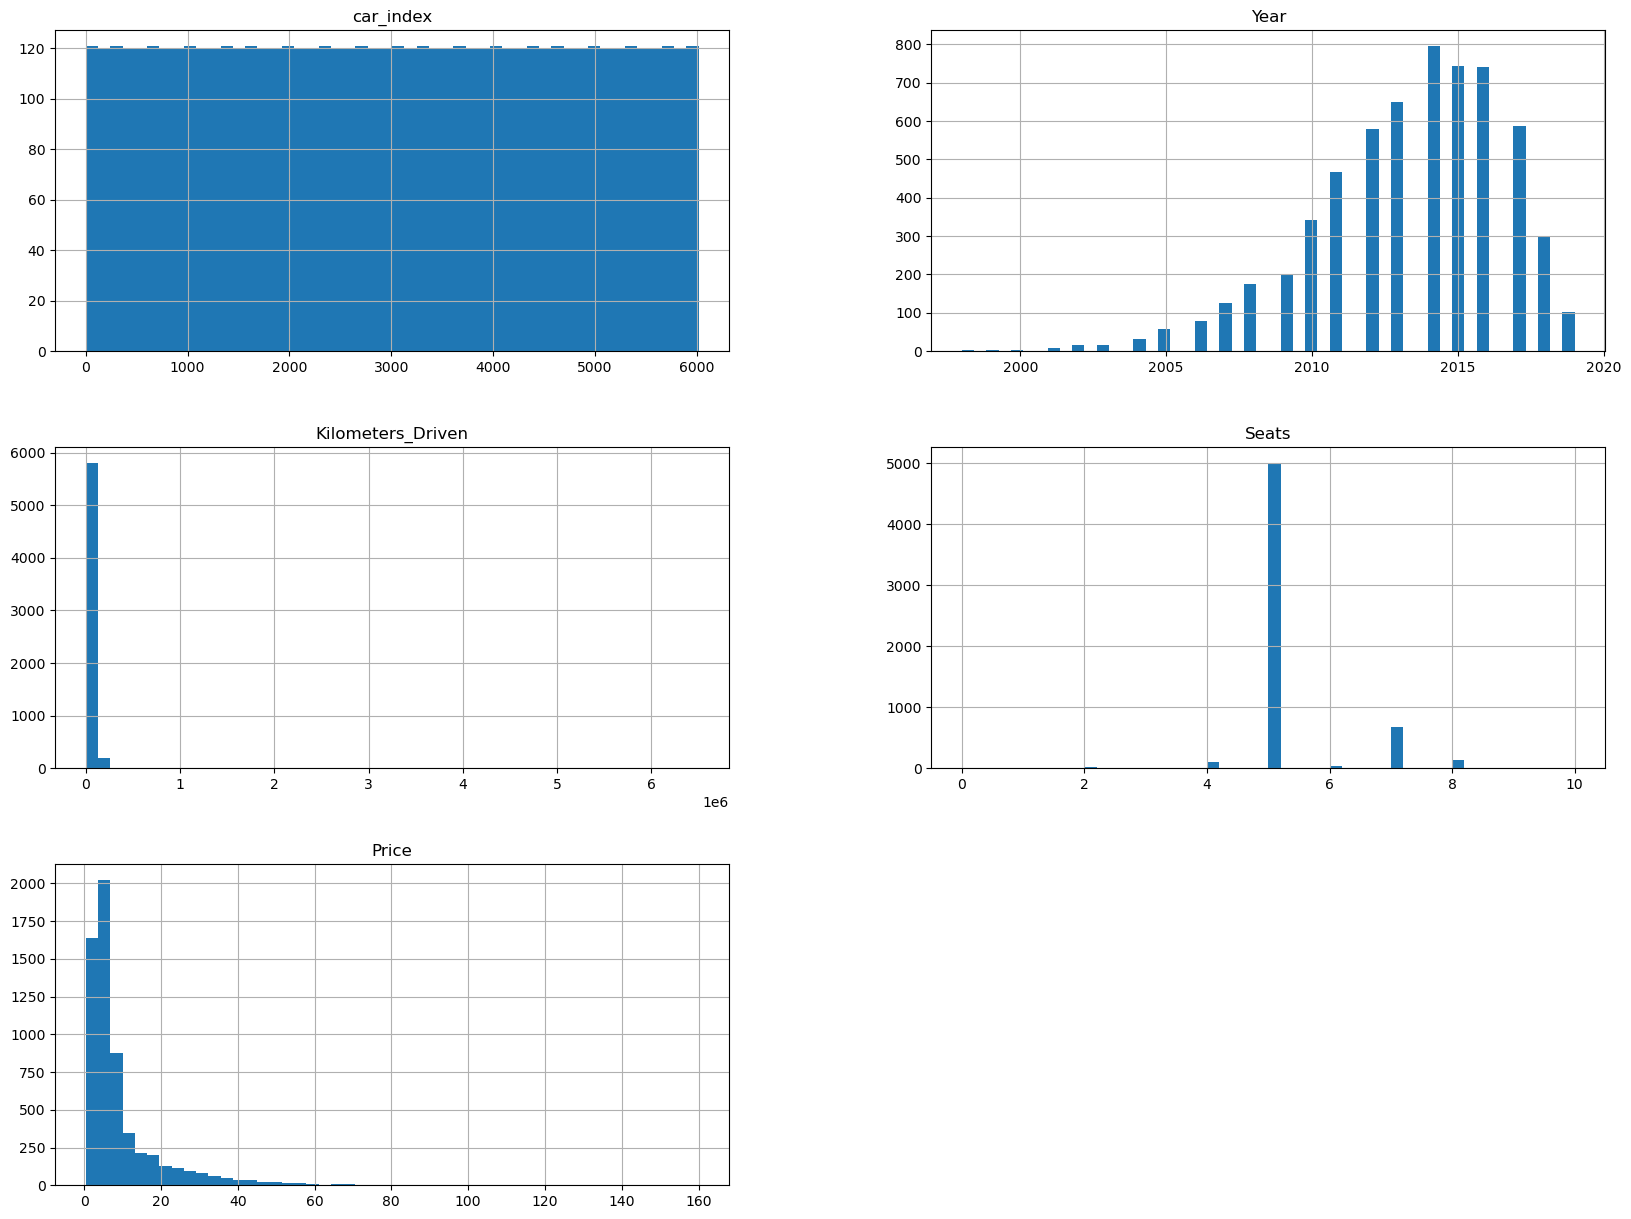

In [756]:
# let's plot a histogram of the numerical columns to get a sense of the distribution
df.hist(bins=50, figsize=(20,15))
xlabel = plt.xlabel('Frequency')
plt.show()

## about the histogram
---------------------------------------------------------------------------------------------------------------
### first we will drop the 'car_id' column as it is not useful for our analysis.

### the 'Year' distribution is right-skewed, which means that most cars in the dataset are newer models.

### the 'Price' distribution is left-skewed, which means that most cars in the dataset are cheaper.

### the 'Seat' distribution is medium-skewed, which means that most cars in the dataset have 5 seats.

In [757]:
# the car_id column is not useful for our analysis, so we will drop it.
df.drop('car_index', axis=1, inplace=True)

# ! before we proceed, let's create a test set and set it aside.
## # we will use 80% of the data for training and 20% for testing.
## # our target variable is the 'price' column.


In [758]:
# using the scikit-learn library to split the dataset into training and testing sets
X = df.drop('Price', axis=1) # features
y = df[['Price']] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# let's check the shape of the training and testing sets

In [759]:
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (4815, 12) (4815, 1)
Testing set: (1204, 12) (1204, 1)


# let's create a copy of the training set to explore the data without harming the original dataset

In [760]:
df_train = df.copy()

# let's visualize the relationship between the 'Year' and 'Price' columns


In [761]:
fig = px.scatter(df_train, x='Year', y='Price', color='Year',
                 title='سنة الصنع vs السعر',
                 labels={'Year': 'سنة الصنع', 'Price': 'السعر بالروبية الهندية'})
fig.show()

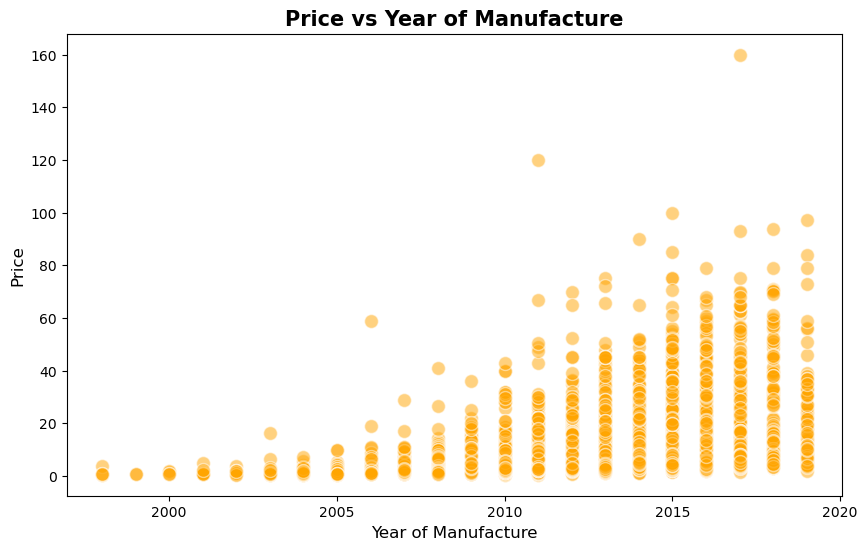

In [762]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Year'], df_train['Price'], alpha=0.5, edgecolors='w', s=100, color='orange')
plt.title('Price vs Year of Manufacture', fontsize=15, fontweight='bold')

plt.xlabel('Year of Manufacture', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

### now let's how much every attribute correlates with the our target variable 'Price' using a heatmap


<Axes: >

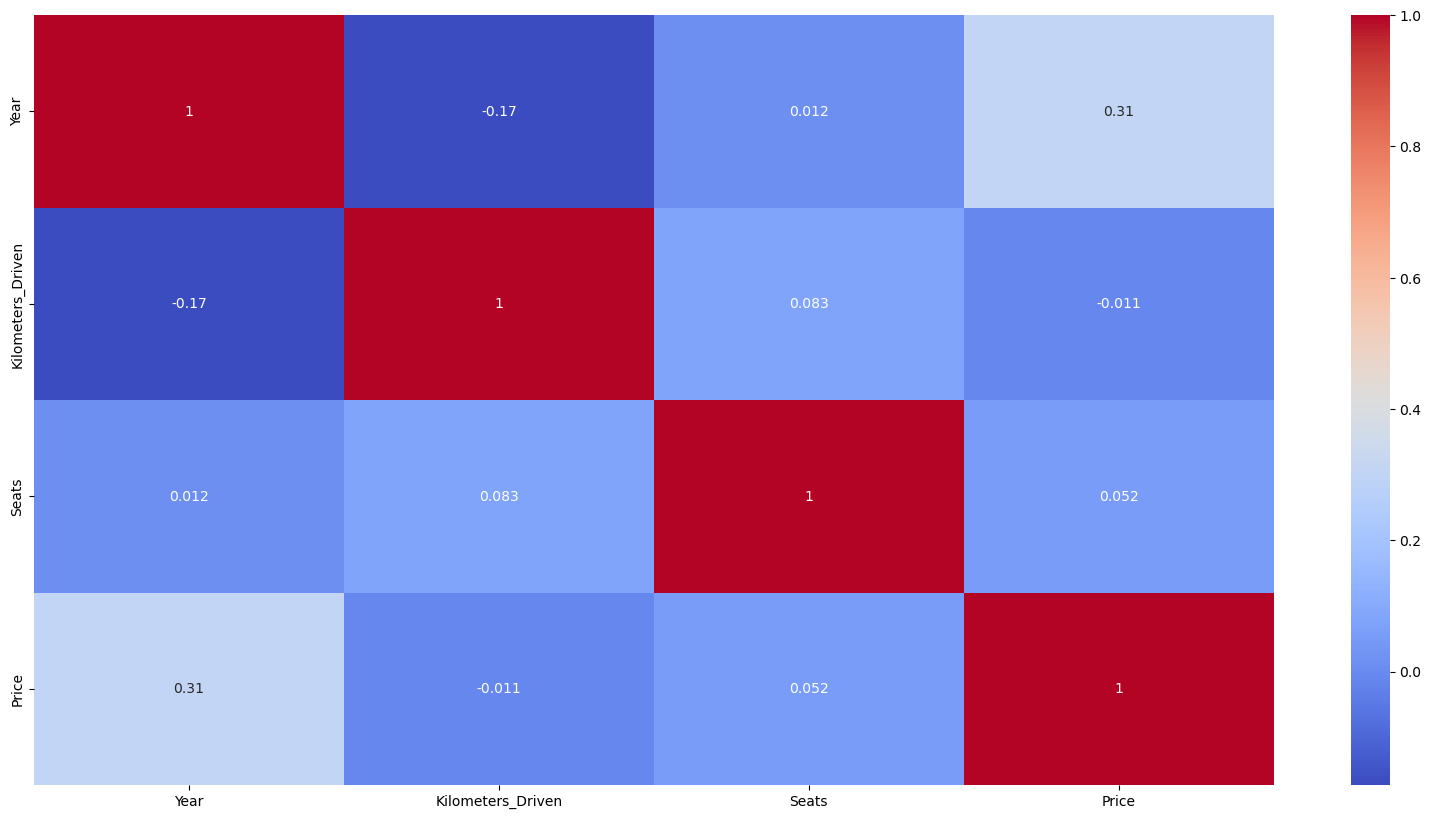

In [763]:
corr_matrix = df_train.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

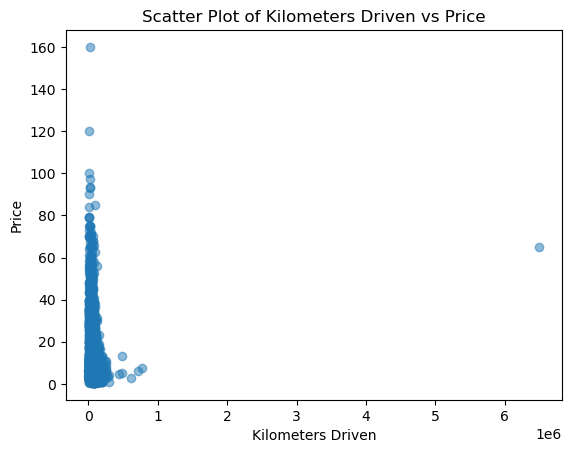

In [764]:
plt.scatter(df['Kilometers_Driven'], df['Price'], alpha=0.5)
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('Scatter Plot of Kilometers Driven vs Price')
plt.show()

### we can see that the 'Year' column has the highest positive correlation with the 'Price'.
### and the 'Kilometers_Driven' column has the highest negative correlation with the 'Price'.
### it's means that the price of a car tends to increase with the year of manufacture.
### and the price of a car tends to decrease with the number of kilometers driven.

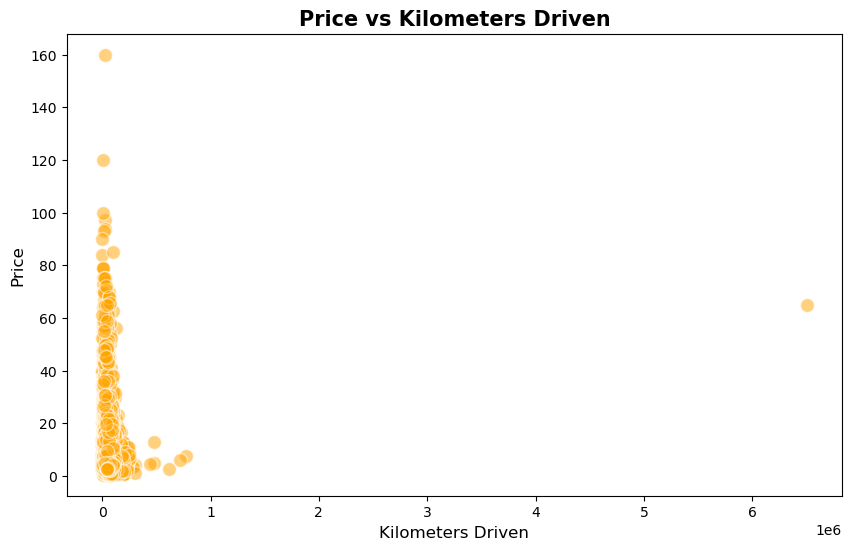

In [765]:
# so let's plot the relationship between the price and the kilometers_Driven
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Kilometers_Driven'], df_train['Price'], alpha=0.5, edgecolors='w', s=100, color='orange')
plt.title('Price vs Kilometers Driven', fontsize=15, fontweight='bold')
xlabel = plt.xlabel('Kilometers Driven', fontsize=12)
ylabel = plt.ylabel('Price', fontsize=12)
 

## let's visualize the relationship between the price and the Location
## we will select top 7 locations with the highest average price

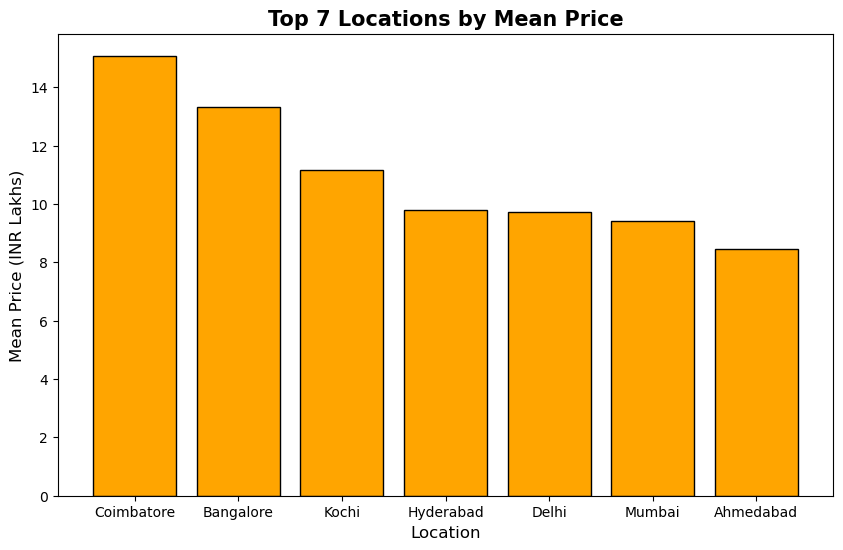

In [766]:
location_mean_price = df.groupby('Location')['Price'].mean().reset_index()

top_locations = location_mean_price.sort_values(by='Price', ascending=False).head(7)

# Visualization using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_locations['Location'], top_locations['Price'], color='orange', edgecolor='black')
plt.title('Top 7 Locations by Mean Price', fontsize=15, fontweight='bold')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Mean Price (INR Lakhs)', fontsize=12)
plt.show()

In [768]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 4248 to 860
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4815 non-null   object 
 1   Location           4815 non-null   object 
 2   Year               4815 non-null   int64  
 3   Kilometers_Driven  4815 non-null   int64  
 4   Fuel_Type          4815 non-null   object 
 5   Transmission       4815 non-null   object 
 6   Owner_Type         4815 non-null   object 
 7   Mileage            4814 non-null   object 
 8   Engine             4784 non-null   object 
 9   Power              4784 non-null   object 
 10  Seats              4780 non-null   float64
 11  New_Price          661 non-null    object 
 12  Manufacturer       4815 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 526.6+ KB


# Data Cleaning

In [769]:
# let's copy the data to a new dataframe
used_cars_df = X_train.copy()

In [770]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 4248 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4815 non-null   object 
 1   Location           4815 non-null   object 
 2   Year               4815 non-null   int64  
 3   Kilometers_Driven  4815 non-null   int64  
 4   Fuel_Type          4815 non-null   object 
 5   Transmission       4815 non-null   object 
 6   Owner_Type         4815 non-null   object 
 7   Mileage            4814 non-null   object 
 8   Engine             4784 non-null   object 
 9   Power              4784 non-null   object 
 10  Seats              4780 non-null   float64
 11  New_Price          661 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 489.0+ KB


# Name column is not useful for our analysis, so we will drop it.

<Axes: xlabel='Name'>

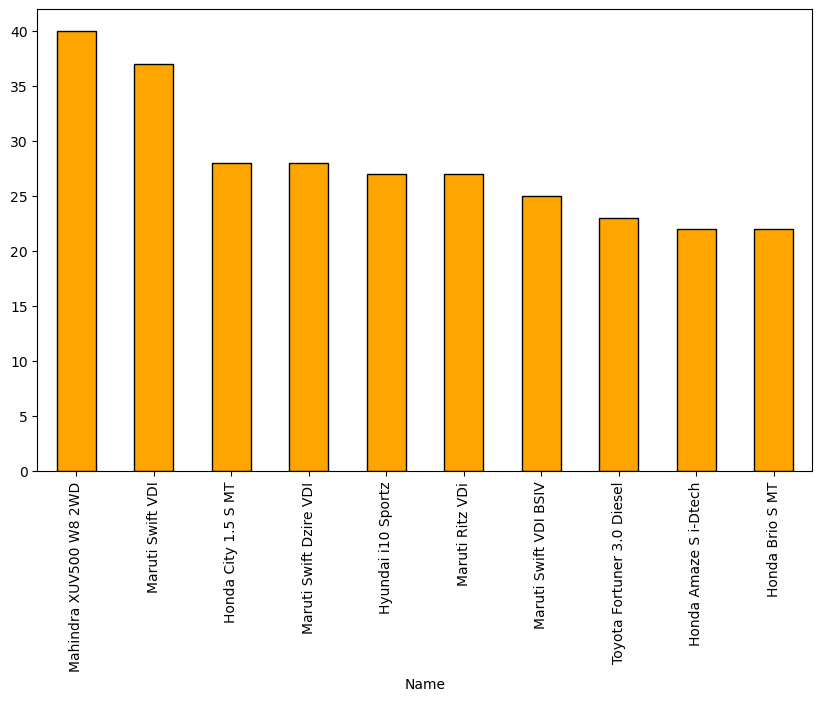

In [771]:
# let's most names rpeated in the name column
used_cars_df['Name'].value_counts().head(10).plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='black')

### let's plot the Fuel_Type 

<Axes: xlabel='Fuel_Type'>

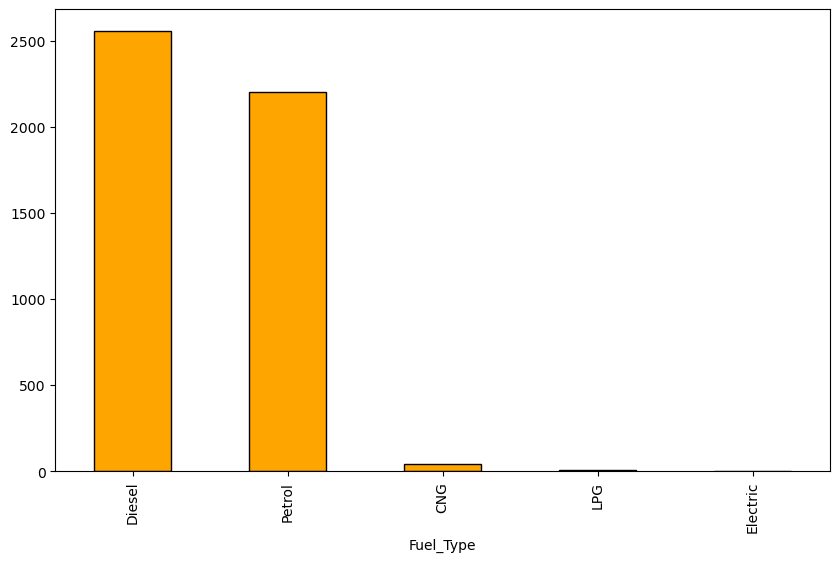

In [772]:
used_cars_df['Fuel_Type'].value_counts().plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='black')

# let's take a look at the Owner_type column

<Axes: xlabel='Owner_Type'>

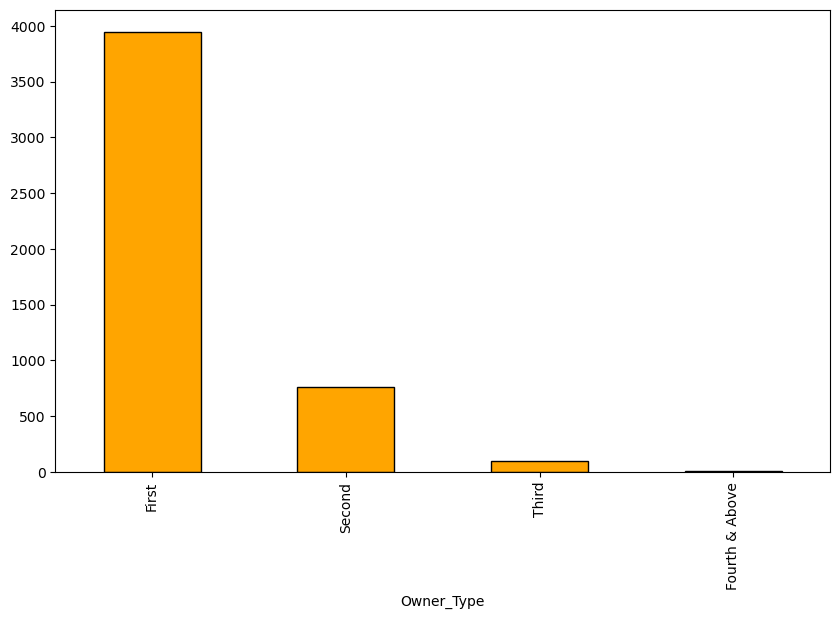

In [773]:
used_cars_df['Owner_Type'].value_counts().plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='black')

### we extract the manufacturer name from the 'Name' column
### and store it in a new column 'Manufacturer'

In [774]:
used_cars_df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1832,Hyundai i20 1.2 Magna,Jaipur,2011,82000,Petrol,Manual,Second,18.5 kmpl,1197 CC,80 bhp,5.0,NaN
494,Maruti Ertiga VXI,Jaipur,2014,98000,Petrol,Manual,First,16.02 kmpl,1373 CC,93.7 bhp,7.0,NaN
533,Honda City 1.5 V AT,Mumbai,2010,69000,Petrol,Automatic,Second,16.8 kmpl,1497 CC,118 bhp,5.0,NaN
3112,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2009,156056,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,NaN
5317,Hyundai EON Era Plus,Kochi,2015,43993,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN
1259,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN
39,Volkswagen Polo Diesel Trendline 1.2L,Chennai,2013,62000,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN
1012,Toyota Innova Crysta 2.4 GX MT,Chennai,2017,67489,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,19.37 Lakh
1138,BMW 5 Series 2013-2017 530d M Sport,Bangalore,2015,16900,Diesel,Automatic,First,14.69 kmpl,2993 CC,258 bhp,5.0,NaN
5135,Honda Jazz VX Diesel,Chennai,2016,14980,Diesel,Manual,First,27.3 kmpl,1498 CC,98.6 bhp,5.0,10.81 Lakh


<Axes: xlabel='Manufacturer'>

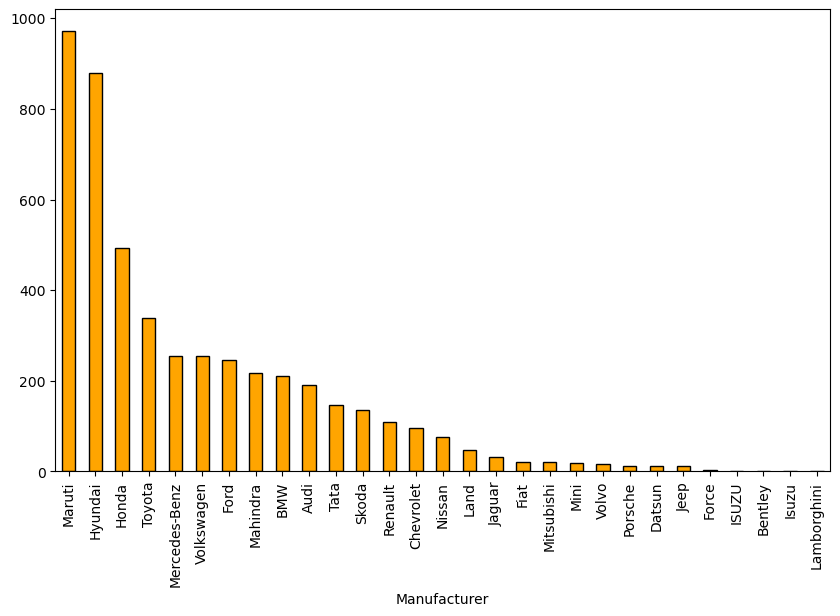

In [775]:
used_cars_df['Manufacturer'] = used_cars_df['Name'].apply(lambda x: x.split()[0])
used_cars_df['Manufacturer'].value_counts().plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='black')


# Top 5 manufacturers

<Axes: ylabel='count'>

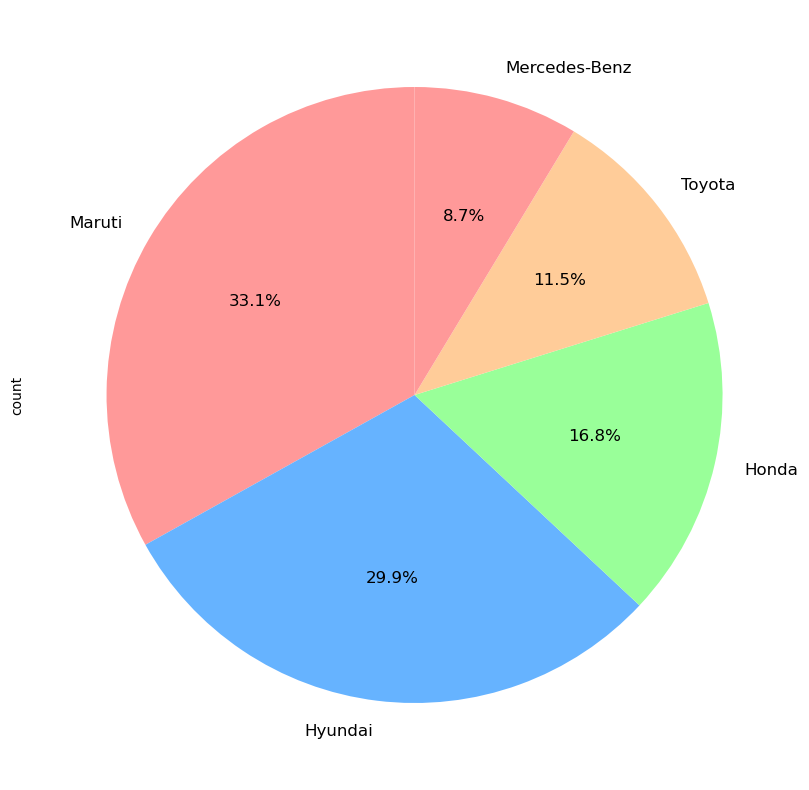

In [776]:
used_cars_df['Manufacturer'].value_counts().head(5).plot(kind='pie', figsize=(15, 10),
                                                         autopct='%1.1f%%', startangle=90, 
                                                         fontsize=12, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# relationship between the manufacturer and the price

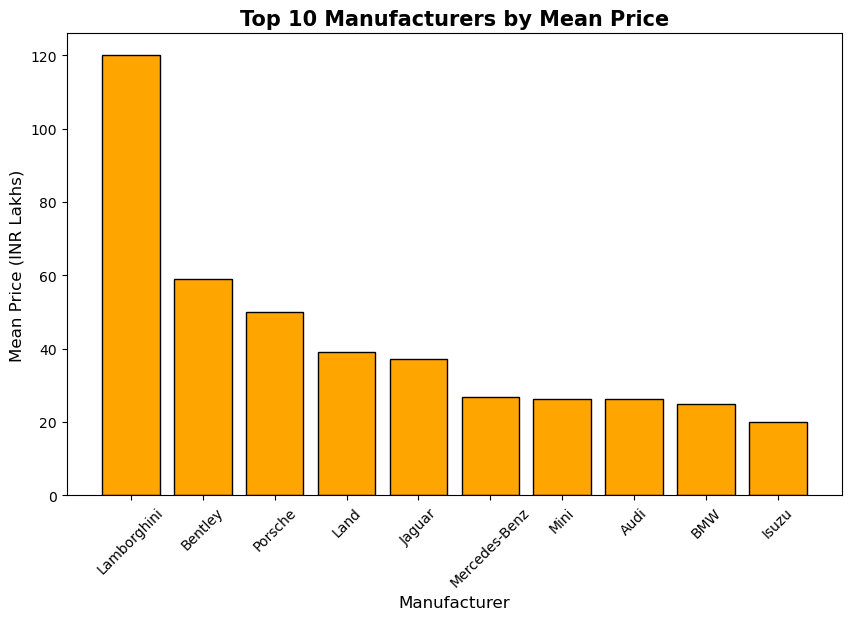

In [777]:
df_con = pd.concat([used_cars_df['Manufacturer'], y_train], axis=1)

# let's see the top 10 manufacturers by mean price
manufacturer_mean_price = df_con.groupby('Manufacturer')['Price'].mean().reset_index()
top_manufacturers = manufacturer_mean_price.sort_values(by='Price', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_manufacturers['Manufacturer'], top_manufacturers['Price'], color='orange', edgecolor='black')
plt.title('Top 10 Manufacturers by Mean Price', fontsize=15, fontweight='bold')
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Mean Price (INR Lakhs)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# now le't prepare the data for the machine learning model

## let's use the imputer class from the scikit-learn library to fill the missing numerical values

In [778]:
X_test.shape

(1204, 12)

In [779]:
numerical_cols = X_train.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train[numerical_cols])
X_train[numerical_cols] = imputer.transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

## let's use the imputer class from the scikit-learn library to fill the missing categorical values

In [780]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(X_train[['Engine', 'Power']])
X_train[['Power', 'Engine']] = imputer_cat.transform(X_train[['Engine', 'Power']])
X_test[['Power', 'Engine']] = imputer_cat.transform(X_test[['Engine', 'Power']])

### there is just one null in the 'Mileage' column we will fill it with the mode

In [781]:
X_train['Mileage'].fillna(X_train['Mileage'].mode()[0], inplace=True)
X_test['Mileage'].fillna(X_train['Mileage'].mode()[0], inplace=True)

/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_3845/2466673538.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/6g/5pq4j4kn1ng2t80r1jn1jjrw0000gn/T/ipykernel_3845/2466673538.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

### now we will start to build our model
### we will start by extracting the manufacturer name from the 'Name' column
### and then drop the 'Name' column

In [782]:
X_train['Manufacturer'] = X_train['Name'].apply(lambda x: x.split()[0])
X_test['Manufacturer'] = X_test['Name'].apply(lambda x: x.split()[0])

### drop the "Name" column

In [783]:
X_train.drop('Name', axis=1, inplace=True)
X_test.drop('Name', axis=1, inplace=True)

## the new_price column have > 4000 missing values we will prefer to drop it

In [784]:
X_train.drop('New_Price', axis=1, inplace=True)
X_test.drop('New_Price', axis=1, inplace=True)

In [785]:
# let's select the columns that to encode using OneHotEncoder, and Ordinal Encoder
col_OneHotEncoder = ['Manufacturer', 'Location']
col_OrdinalEncoder=['Fuel_Type', 'Transmission', 'Owner_Type','Mileage', 'Engine', 'Power']
one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

In [786]:
# Before transforming the test data, we need to ensure that the categories in the test set are consistent with the categories in the training set
# We can achieve this by using the 'handle_unknown' parameter of the OneHotEncoder and OrdinalEncoder

# Modify the column transformers to include the 'handle_unknown' parameter
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), col_OneHotEncoder),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), col_OrdinalEncoder)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_transformed = preprocessor.transform(X_test)

# Create DataFrames for the transformed data
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out(), index=X_train.index)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out(), index=X_test.index)

# Drop the original columns that were encoded
X_train.drop(col_OneHotEncoder, axis=1, inplace=True)
X_train.drop(col_OrdinalEncoder, axis=1, inplace=True)
X_test.drop(col_OneHotEncoder, axis=1, inplace=True)
X_test.drop(col_OrdinalEncoder, axis=1, inplace=True)

# Concatenate the transformed columns with the original columns
X_train = pd.concat([X_train, X_train_transformed_df], axis=1) 
X_test = pd.concat([X_test, X_test_transformed_df], axis=1)




In [787]:
X_train

,Year,Kilometers_Driven,Seats,onehot__Manufacturer_Audi,onehot__Manufacturer_BMW,onehot__Manufacturer_Bentley,onehot__Manufacturer_Chevrolet,onehot__Manufacturer_Datsun,onehot__Manufacturer_Fiat,onehot__Manufacturer_Force,...,onehot__Location_Pune,ordinal__Fuel_Type,ordinal__Transmission,ordinal__Owner_Type,ordinal__Mileage,ordinal__Engine,ordinal__Power,remainder__Year,remainder__Kilometers_Driven,remainder__Seats
4248,2011.0,76155.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,4.0,1.0,0.0,239.0,296.0,12.0,2011.0,76155.0,5.0
4129,2014.0,64637.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,342.0,349.0,36.0,2014.0,64637.0,5.0
2534,2018.0,2900.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,365.0,327.0,14.0,2018.0,2900.0,5.0
2893,2011.0,150000.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,64.0,1.0,87.0,2011.0,150000.0,8.0
2860,2017.0,98500.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,345.0,285.0,14.0,2017.0,98500.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,2015.0,27000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,216.0,355.0,36.0,2015.0,27000.0,5.0
5191,2019.0,9000.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,52.0,99.0,73.0,2019.0,9000.0,7.0
5226,2013.0,140000.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,127.0,74.0,72.0,2013.0,140000.0,7.0
5390,2014.0,76414.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,384.0,350.0,36.0,2014.0,76414.0,5.0


### we can see that the 'Kilometers_Driven' column has some outliers.
### so we will do some scaling on this column using the RobustScaler because it is robust to outliers.

In [788]:
robust_scaler = RobustScaler()
X_train['Kilometers_Driven_Scaled'] = robust_scaler.fit_transform(X_train[['Kilometers_Driven']])
X_test['Kilometers_Driven_Scaled'] = robust_scaler.transform(X_test[['Kilometers_Driven']])

In [789]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4815 entries, 4248 to 860
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4815 non-null   float64
 1   Kilometers_Driven                   4815 non-null   float64
 2   Seats                               4815 non-null   float64
 3   onehot__Manufacturer_Audi           4815 non-null   float64
 4   onehot__Manufacturer_BMW            4815 non-null   float64
 5   onehot__Manufacturer_Bentley        4815 non-null   float64
 6   onehot__Manufacturer_Chevrolet      4815 non-null   float64
 7   onehot__Manufacturer_Datsun         4815 non-null   float64
 8   onehot__Manufacturer_Fiat           4815 non-null   float64
 9   onehot__Manufacturer_Force          4815 non-null   float64
 10  onehot__Manufacturer_Ford           4815 non-null   float64
 11  onehot__Manufacturer_Honda          4815 non-n

# let's start evaluating the model

In [790]:
# let's start evaluating the model
linear_reagression = LinearRegression()
linear_reagression.fit(X_train, y_train)
linear_reagression_prediction = linear_reagression.predict(X_test) 

# mean absolute error (MAE)

In [791]:
# mean absolute error (MAE)
mae = mean_absolute_error(y_test, linear_reagression_prediction)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 3.52589676490931


In [792]:
# Random Forest Regressor
rand_forest_regressor = RandomForestRegressor()
rand_forest_regressor.fit(X_train, y_train)
rand_forest_regressor_prediction = rand_forest_regressor.predict(X_test)

/Users/tariq_assan/miniconda3/envs/pydata-book/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



# let's see how close our predictions are to the actual values

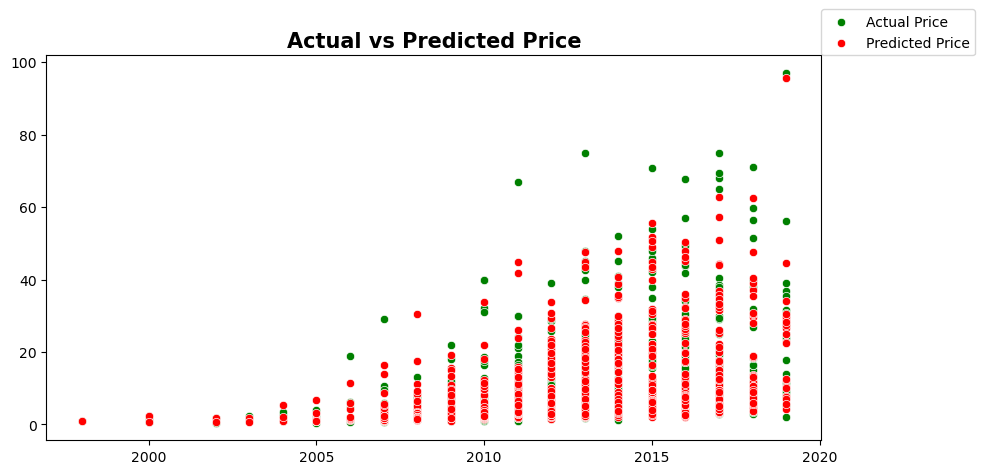

In [806]:
# let's see how close our predictions are to the actual values
X_test_features = X_test.iloc[:, 0].values.ravel() if hasattr(X_test, 'shape') and X_test.shape[1] > 1 else X_test.values.ravel()
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_test_features, y=y_test.values.ravel(), color='green', label='Actual Price')
sns.scatterplot(x=X_test_features,  y=rand_forest_regressor_prediction, color='red', label='Predicted Price')

plt.title('Actual vs Predicted Price', fontsize=15, fontweight='bold')
plt.legend(loc=(1,1))
plt.show()